In [2]:
include("../code/headers.jl")

LoadError: LoadError: ArgumentError: Package LightGraphs not found in current path:
- Run `import Pkg; Pkg.add("LightGraphs")` to install the LightGraphs package.

in expression starting at /home/crotti/sourcecoding/code/FactorGraph.jl:2
in expression starting at /home/crotti/sourcecoding/code/headers.jl:1

# Checks for factor and variable updates

In [2]:
N = 10
p0 = fill(0.0, -N:N)
p0[0:3] .= rand(4)
p0[-1:-1:-3] .= p0[1:3]
p0 ./= sum(p0)
p1 = copy(p0)
p2 = copy(p0)

for i=1:4
    p1 = iter_slow_factor(iter_slow_var(p1,2-1),3-1)
    p2 = iter_factor(iter_var(p2,2-1),3-1)
end
[p1[-N:N] p2[-N:N]]

21×2 Array{Float64,2}:
 0.0          0.0
 0.0          0.0
 0.0          0.0
 1.63125e-23  1.63125e-23
 3.62465e-22  3.62465e-22
 6.96702e-11  6.96702e-11
 1.86528e-7   1.86528e-7
 0.00195959   0.00195959
 0.0258637    0.0258637
 0.314397     0.314397
 0.315559     0.315559
 0.314397     0.314397
 0.0258637    0.0258637
 0.00195959   0.00195959
 1.86528e-7   1.86528e-7
 6.96702e-11  6.96702e-11
 3.62465e-22  3.62465e-22
 1.63125e-23  1.63125e-23
 0.0          0.0
 0.0          0.0
 0.0          0.0

# Results

In [37]:
using Unzip

# Rm = 0.2:0.1:0.8
# for r in Rm
#      α=1-r
#     k=floor(Int, 2/α)
#     s=k+1-2/α
#     K=[fill(0,k-1); s; 1-s]
#     @show r, K
# end

# k=mix of degrees l,l+1, d=2
Rm,Dm=map(0.8:0.01:0.99) do r
# Rm,Dm=map(0.01:0.01) do r
    @show r
    α=1-r
    k=floor(Int, 2/α)
    s=k+1-2/α
    K=[fill(0,k-1); s; 1-s]
#     K .*= K .> 1e-10
    K ./ sum(K)
    r1,d,p = RS(K, [0,1]; N=200, tol=1e-15, maxiter=10^5)
    @assert r ≈ r1
    r,d
end |>unzip 

r = 0.8
err = 9.992007221626409e-16
iter = 334
Fia = -2.000000030248131
Fi = 1.0365745086283253
Fa = 0.04677723496836231
O = 0.9166482866514435
r = 0.81
err = 7.771561172376096e-16
iter = 333
Fia = -2.000000011904045
Fi = 1.0343480715667934
Fa = 0.04341750754754552
O = 0.922234432789706
r = 0.82
err = 7.771561172376096e-16
iter = 333
Fia = -2.000000001929809
Fi = 1.0321762302932043
Fa = 0.03991594071766128
O = 0.9279078309189437
r = 0.83
err = 9.992007221626409e-16
iter = 332
Fia = -2.000000000478973
Fi = 1.0299953617409299
Fa = 0.036614559600048606
O = 0.9333900791379944
r = 0.84
err = 9.992007221626409e-16
iter = 330
Fia = -2.0000000000668763
Fi = 1.0278349346513238
Fa = 0.033381249832362556
O = 0.9387838155831899
r = 0.85
err = 7.771561172376096e-16
iter = 330
Fia = -2.0000000000063856
Fi = 1.0256961907381121
Fa = 0.03020971504355458
O = 0.9440940942247188
r = 0.86
err = 8.881784197001252e-16
iter = 331
Fia = -2.000000000000587
Fi = 1.0235754482733261
Fa = 0.027142844097470947
O = 0

([0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99], [0.041675856674278255, 0.03888278360514702, 0.036046084540528156, 0.033304960431002784, 0.030608092208405047, 0.027952952887640603, 0.025359146185104986, 0.022832861932173987, 0.020370784947591758, 0.017979055383502196, 0.01566612917737653, 0.013449978144655372, 0.011320125859107744, 0.009302254807512012, 0.007397829094440367, 0.005626430242346991, 0.004010648891537516, 0.0014707358385408487, 0.0008131727806915956, 0.0002850227245214665])

In [55]:
r = 0.81
    α=1-r
    k=floor(Int, 2/α)
    s=k+1-2/α
    K=[fill(0,k-1); s; 1-s]
#     K .*= K .> 1e-10
    K ./ sum(K)
    r1,d,p = RS(K, [0,1]; N=300, tol=1e-15, maxiter=10^5)
K

err = 9.992007221626409e-16
iter = 334
Fia = -2.0000000119040924
Fi = 1.0343480715668432
Fa = 0.04341750754754552
O = 0.9222344327897037


11-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.47368421052631327
 0.5263157894736867

In [23]:
#k=3 , d=mix of degrees 1,2
R12,D12=map(1/3:0.01:2/3) do r
    #2-t=t+2(1-t)=3(1-r) 
    t=3r-1
    r1,d,p = RS([0,0,1], [t,1-t]; N=20, tol=1e-10, maxiter=10000)
    @assert r ≈ r1
    r,d
end |> unzip

err = 9.799649980379854e-11
iter = 321
err = 9.832717973168315e-11
iter = 316
err = 9.343753548662903e-11
iter = 312
err = 9.789741239885075e-11
iter = 307
err = 9.628009500772805e-11
iter = 303
err = 9.594142147406615e-11
iter = 299
err = 9.671508038877619e-11
iter = 295
err = 9.851192084298077e-11
iter = 291
err = 9.318612548270266e-11
iter = 288
err = 9.658385202726549e-11
iter = 284
err = 9.269279788171048e-11
iter = 281
err = 9.754175245291208e-11
iter = 277
err = 9.480610740908446e-11
iter = 274
err = 9.265027633986733e-11
iter = 271
err = 9.945688717039047e-11
iter = 267
err = 9.828432512293261e-11
iter = 264
err = 9.759976160594874e-11
iter = 261
err = 9.738010398052666e-11
iter = 258
err = 9.760842134554082e-11
iter = 255
err = 9.827472169376961e-11
iter = 252
err = 9.93732873766362e-11
iter = 249
err = 9.17650955223337e-11
iter = 247
err = 9.346484697303481e-11
iter = 244
err = 9.555589652876506e-11
iter = 241
err = 9.80465153510579e-11
iter = 238
err = 9.149603297231579e-11


([0.3333333333333333, 0.3433333333333333, 0.35333333333333333, 0.36333333333333334, 0.37333333333333335, 0.38333333333333336, 0.3933333333333333, 0.4033333333333333, 0.41333333333333333, 0.42333333333333334  …  0.5733333333333334, 0.5833333333333334, 0.5933333333333334, 0.6033333333333334, 0.6133333333333333, 0.6233333333333333, 0.6333333333333333, 0.6433333333333333, 0.6533333333333333, 0.6633333333333333], [0.20962056095628745, 0.20735484854520947, 0.20510675972527204, 0.2028774314000234, 0.2006681095706887, 0.1984801629443529, 0.1963150986467942, 0.1941745804314955, 0.19206044986217263, 0.18997475105376183  …  0.1646778261813926, 0.16371804813895963, 0.16292944871509907, 0.1623407396438657, 0.16198761138123774, 0.1619150106824913, 0.16218037482422176, 0.16285832422512597, 0.1640476353615466, 0.16588187704481594])

In [30]:
#k=3, d = mix of degrees 2,3
R23,D23=map(0.0:0.01:1/3) do r
    # 3-t=2t+3(1-t)=<d> = 3(1-r) -> t=3r
    t=3r
    r1,d,p,q = RS([0,0,1], [0,t,1-t]; N=20, tol=1e-10, maxiter=10000)
    @assert r ≈ r1
    r,d
end |>unzip

err = 9.784095755804856e-11
iter = 733
Fia = -4.766194574093808
Fi = 3.740738084052149
Fa = 0.6301059775220258
O = 0.3953505125196327
err = 9.733180927895546e-11
iter = 710
Fia = -4.65472709054686
Fi = 3.637989696691119
Fa = 0.6151166085667421
O = 0.4016207852889988
err = 9.758499563972123e-11
iter = 688
Fia = -4.546677999931233
Fi = 3.5381752110426135
Fa = 0.6006716241363569
O = 0.40783116475226244
err = 9.833306391371366e-11
iter = 667
Fia = -4.441826611649474
Fi = 3.4411081088824305
Fa = 0.5867344713426033
O = 0.4139840314244403
err = 9.930467559371436e-11
iter = 647
Fia = -4.339972748682597
Fi = 3.3466192020365875
Fa = 0.5732719536708506
O = 0.4200815929751591
err = 9.635625630721734e-11
iter = 629
Fia = -4.240934371980117
Fi = 3.254554622237103
Fa = 0.5602538491400422
O = 0.42612590060297206
err = 9.676559553639663e-11
iter = 611
Fia = -4.144545529129482
Fi = 3.1647740860550306
Fa = 0.5476525795503778
O = 0.4321188635240739
err = 9.652528776271652e-11
iter = 594
Fia = -4.050654575

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33], [0.30232474374018364, 0.2991896073555006, 0.2960844176238688, 0.29300798428777985, 0.28995920351242044, 0.28693704969851397, 0.28394056823796304, 0.2809688690843176, 0.2780211210295341, 0.2750965465948728  …  0.2336015808927387, 0.23097235112463632, 0.228358170625707, 0.22575874199075585, 0.22317377881874867, 0.22060300461230437, 0.21804615169011765, 0.2155029600998133, 0.21297317651789582, 0.21045655312219785])

In [12]:
#RS instability?
a=0.54334
Λ=[0,(1-a)/2,a/3]
Λ ./= sum(Λ)
rd,dd,p=RS([0,0,1],Λ; N=10, tol=1e-10, maxiter=10000)

err = 9.824513425016335e-11
iter = 424
Fia = -3.1072001554494135
Fi = 2.1871566231636876
Fa = 0.4162519617591314
O = 0.5037915705265945


(0.18588652886439316, 0.24810421473670274, [6.539193810448665e-18, 6.34662677964226e-15, 3.2910939322005455e-12, 8.935540334190384e-10, 1.227338738008608e-7, 8.3506763004038e-6, 0.00029590923164253514, 0.005899824359813897, 0.057565748390582636, 0.23605422057332928  …  0.23605422057332928, 0.057565748390582636, 0.005899824359813897, 0.00029590923164253514, 8.3506763004038e-6, 1.227338738008608e-7, 8.935540334190384e-10, 3.2910939322005455e-12, 6.34662677964226e-15, 6.539193810448665e-18], [1.8075123088486724e-9, 5.455362048388985e-8, 1.227665134313688e-6, 1.989203863453286e-5, 0.0002274508871411418, 0.0018098077583892408, 0.01027816807148611, 0.04335993156871683, 0.12286711847717163, 0.20862117178007458  …  0.20862117178007458, 0.1228671184771716, 0.04335993156871683, 0.010278168071486111, 0.0018098077583892408, 0.00022745088714114177, 1.9892038634532858e-5, 1.2276651343136881e-6, 5.455362048388985e-8, 1.8075123088486724e-9])

In [37]:
include("../code/rs.jl")

iter_slow_var (generic function with 1 method)

In [38]:
using Quadmath

In [41]:
ks = 101
Dm = zeros(length(ks))
Rm = copy(Dm)
for (i,k) in enumerate(ks)
    @show k
    K = [fill(0,k-1); 1]
    Rm[i],Dm[i],p = RS(K, [0,1]; N=10, tol=1e-15, maxiter=10^5, T=Float128)
    flush(stdout)
end

k = 101
err = 9.34014908544508930589155439195514443e-16
iter = 328
Fia = -2.00000000000000923636945822889676822e+00
Fi = 1.00160254151394390092959550065361717e+00
Fa = 1.08932497420083584016312272583700249e-03
O = 9.97308133511864499599699605517314046e-01
p[-1:1] = Float128[2.83067263555384391134289458880904592e-02, 9.43386547288922187758233563714887867e-01, 2.83067263555384391134289458880904592e-02]


In [42]:
Rm

1-element Vector{Float64}:
 0.9801980198019802

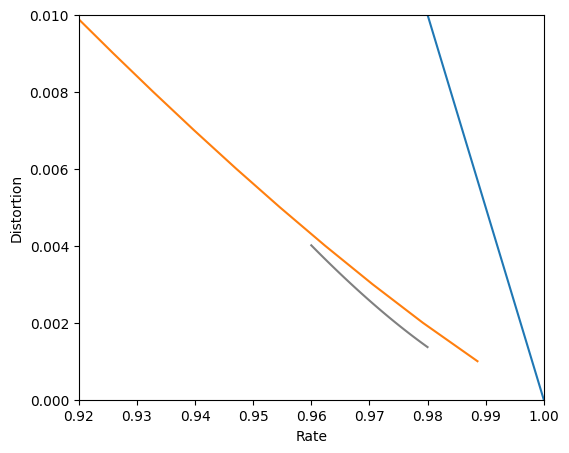

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7efce591e8d0>

In [26]:
using PyPlot
H(p)=1+p*log2(p)+(1-p)*log2(1-p)
fig, ax = PyPlot.subplots(figsize=(6,5))
PyPlot.xlim((.92,1)); PyPlot.ylim((0, 0.01))
PyPlot.xlabel("Rate")
PyPlot.ylabel("Distortion")
PyPlot.plot((0,1),(0.5,0), label="trival")
PyPlot.plot(H.(0:0.001:0.5), 0:0.001:0.5, label="information bound")
PyPlot.plot(Rm,Dm, "-", label="RS d ~ δ₂, k ~ rδₗ+(1-r)δₗ₊₁", c=:gray)
# PyPlot.plot((0.5, 0.174603333333333332)..., "o", label="MS d ~ ½(δ₁+δ₂), k ~ δ₃") 
# PyPlot.plot(R23,D23, "-", label="RS d ~ rδ₂+(1-r)δ₃, k ~ δ₃") 
# PyPlot.plot(R12,D12, "-", label="RS d ~ rδ₁+(1-r)δ₂, k ~ δ₃")
# PyPlot.plot(0.267,0.23, "*", label="SP")
# PyPlot.plot(rd,dd, "+", label="instability")
# PyPlot.legend()
# xlims!((.8,1)); ylims!((0, .1))